<a href="https://colab.research.google.com/github/hhaeri/econnlpcourse.github.io/blob/master/code/Python-Text-Overview_HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We did a quick tour of Python and saw some of its features earlier in today's class. Let us now see what off-the-shelf support exists in terms of NLP tools in Python in the rest of this class, and some of next class.

Before we get into NLP methods in depth, let us first look at how to do basic corpus analysis in Python. That is the goal of this notebook.

Based on:
- Chapters 1--3 in NLTK. (Chapters 1--7 may be useful for non NLP focused folks, generally, IMO)

Other useful resources:
- Python worksheets in Katrin Erk's NLP courses: https://www.katrinerk.com/teaching/resources

# Why?
The first step before we build any NLP models is to "understand" the data a little bit.

What is "understanding" the data?
    - Looking at frequently used words/ngrams in the data
    - Looking at collocations (what words go together)
    - How can we visualize text corpora?
    - lexical diversity, linguistic coverage etc in the dataset
    
Why do we need this?
    - To get a general idea of what the texts are about
    - Identify potentially useful features to use in an NLP model that uses this data
    - Identify potential noise in the data
    - Understand limitations of the data (e.g., potential bias)

## Installing necessary libraries
Before proceeding further, we have to install the necessary Python libraries (libraries can be thought of as a collection of pre-implemented utilities we can just use right away)

- nltk
- matplotlib (for plots)

We will dig into some texts using the NLTK toolkit. NLTK (Natural Language Toolkit) is a popular Python library for natural language processing and text analysis. It provides easy-to-use tools for:

Tokenization: Breaking text into sentences or words.

Text analysis: Finding word frequencies, concordances, similar words, and contexts.

Corpus access: Working with built-in text corpora like Shakespeare, Moby Dick, etc.

Before we dive into analysis, we need to prepare our text:

- Convert it to lowercase (to normalize).

- Split it into tokens (words and punctuation).

- Wrap it in an NLTK Text object for advanced operations like concordances and dispersion plots.

Installing libraries in python happens through a command called pip, so here we go....

In [2]:
!pip install nltk
!pip install matplotlib

#the ! symbol lets us run programs that are typically run from a command line tool in a notebook.

In [3]:
#If you are able to import these libraries without errors, that means you installed them correctly
import nltk
import matplotlib

Next we download a supporting resource for NLTK's punkt tokenizer using `nltk.download('punkt_tab')`.

punkt is the pre-trained sentence tokenizer in NLTK. It knows how to split text into sentences across different languages (e.g., recognizing that "Dr." is not the end of a sentence).

punkt_tab is an auxiliary data file that provides language-specific abbreviation tables used by punkt. These help the tokenizer handle tricky cases like periods in abbreviations, initials, or numeric formats.


In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Excercise

**Let’s try tokenizing the following text both with and without `punkt_tab` so you can see the difference.**

*Note:* If you already have `punkt_tab` downloaded, you can temporarily remove it by running:

```python
nltk.data.remove("tokenizers/punkt_tab")
```

This will let you first see how the tokenizer behaves *without* the abbreviation tables. Afterward, you can reinstall `punkt_tab` with:

```python
nltk.download("punkt_tab")
```

to observe the improvement.



## Downloading NLTK’s Sample Texts ("book" Collection)

`nltk.download("book")` command downloads the "book" collection of resources from the
Natural Language Toolkit (NLTK) library.

Specifically, it installs a bundle of datasets and corpora that are commonly used in
the NLTK textbook Natural Language Processing with Python. These include:

   - Text corpora like Genesis, Shakespeare, Inaugural Addresses, Chat Corpus, and others.

   - Lexical resources like WordNet.

   - Some sample texts and utilities for exercises from the book.


In [5]:
#Download any data or other non-code resources we need for using the code in the book.
nltk.download("book")


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

Once the data is downloaded to your machine, you can load some of it using the Python interpreter. The first step is to type a special command at the Python prompt which tells the interpreter to load some texts for us to explore: from nltk.book import *

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [10]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [11]:
text4

<Text: Inaugural Address Corpus>

# Elementary Text Analysis

We’ll be using the **NLTK** library to explore some basic text analysis functions in Python. The examples here are adapted from *Chapter 1 of the NLTK book*.

📘 If you’d like to dive deeper, you can:

* [Purchase the book on Amazon](https://www.amazon.com/Natural-Language-Processing-Python-Analyzing/dp/0596516495)
* Or [access the free online version](https://www.nltk.org/book/)

To get started, we’ll read in a text file directly from the web. The file comes from Project Gutenberg:
👉 [Crime and Punishment (by Dostoevsky)](https://www.gutenberg.org/files/2446/2446-0.txt)

*(No hidden agenda here—I just enjoy this play, so I picked it!)*


In [14]:
from urllib import request
'''
urllib is a built-in python library for handling web interactions such as accessing
a web-page, reading its contents etc.
'''
myurl = "https://www.gutenberg.org/files/2446/2446-0.txt"
response = request.urlopen(myurl)
mytext = ""
for line in response:
    # note that each line is a byte string, not regular Python text (string)
    # Since line is in bytes, you need to decode it into a string.
    #"utf-8" is the encoding standard used for most modern text (and especially for web content).
    # .strip()removes any leading or trailing whitespace from the string.That includes spaces, tabs, and \n (newlines).
    mytext += line.decode("utf-8").strip() + "\n"

print(mytext)

﻿
The Project Gutenberg EBook of An Enemy of the People, by Henrik Ibsen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: An Enemy of the People

Author: Henrik Ibsen

Translator: R. Farquharson Sharp

Release Date: December, 2000 [EBook #2446]
Last updated: May 1, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK AN ENEMY OF THE PEOPLE ***



Produced by Martin Adamson.  HTML version by Al Haines.



AN ENEMY OF THE PEOPLE



A play in five acts



by



Henrik Ibsen



Translated by R. Farquharson Sharp


Contents


ACT I
ACT II
ACT III
ACT IV
ACT V


DRAMATIS PERSONAE

Dr. Thomas Stockmann, Medical Officer of the Municipal Baths.
Mrs. Stockmann, his wife.
Petra (their daughter) a teacher.
Ejlif & Morten (their sons, aged 13 and 1

### Preparing Our Text for Analysis


Now that we have our Gutenberg text loaded, we can start analyzing it with NLTK’s text analysis capabilities. Before applying functions like concordances or dispersion plots, we need to tokenize and normalize the text.

---

#### Notes on NLTK `Text` and Tokenization

1. **Tokenization**

   * `sent_tokenize()` splits a raw text into sentences.
   * `word_tokenize()` splits a text (or a sentence) into individual words and punctuation marks.
   * In the example above, `word_tokenize(mytext.lower())`:

     * Converts all text to lowercase (`.lower()`) to normalize it.
     * Splits the text into a list of words/tokens.

2. **`Text` Object in NLTK**

   * `Text` is a class in NLTK that wraps a list of tokens.
   * It allows you to do useful text analysis methods, such as:

     * `text_nltk.concordance("word")` → shows contexts where "word" appears.
     * `text_nltk.similar("word")` → finds words used in similar contexts.
     * `text_nltk.common_contexts(["word1", "word2"])` → shows shared contexts of multiple words.
     * `text_nltk.dispersion_plot(["word1", "word2"])` → visualizes how words are distributed across the text.

3. **Why lowercase?**

   * Converting all tokens to lowercase helps avoid treating “Word” and “word” as different tokens.
   * Makes frequency counts, concordances, and similarity analysis more consistent.

---

This sets up our text for the analysis examples that follow.

In [15]:
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize

text_nltk = Text(word_tokenize(mytext.lower()))

In [17]:
text_nltk

<Text: ﻿ the project gutenberg ebook of an enemy...>

In [19]:
text_nltk[0:10]
#The character \ufeff represents the Unicode character U+FEFF, which is the Byte Order Mark (BOM).

['\ufeff',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'an',
 'enemy',
 'of',
 'the']

### **Exploring Word Contexts with `.concordance()`**

There are many ways to examine the context of a text apart from simply reading it. The `.concordance()` method in NLTK lets us see every occurrence of a word along with its surrounding context. This is useful for understanding how a word is used throughout the text, spotting patterns, or exploring themes. Simply pass the word you’re interested in, and NLTK will display a nicely aligned snippet of each instance with a few words before and after it.Here we look up the word "town" in the guthenberg text:

In [22]:
text_nltk.concordance("town")

Displaying 25 of 82 matches:
or 's elder brother ) , mayor of the town and chief constable , chairman of th
 the action takes place in a coastal town in southern norway , an enemy of the
 life and some business doing in the town . houses and landed property are ris
waving the letter ) . well , now the town will have something new to talk abou
't it the universal opinion that our town is a healthy spot ? hovstad . certai
alled them the `` main artery of the town 's life-blood , '' the `` nerve-cent
lood , '' the `` nerve-centre of our town , '' and the devil knows what else— 
il knows what else— billing . `` the town 's pulsating heart '' was the expres
suppose i was going to run about the town gossiping about it , before i had ab
 ) there will be a nice upset in the town , katherine ; you ca n't imagine wha
 going to be the foremost man in the town ! dr. stockmann ( walking about happ
ing . hovstad , do n't you think the town ought to give dr. stockmann some sor
 he has done a service 

### **Finding Similar Words with `.similar()`**

The `.similar()` method in NLTK shows words that appear in **similar contexts** as the word you specify. This helps reveal words that are used in comparable ways throughout the text, giving insight into vocabulary patterns and semantic relationships.

Example:

```python
text_nltk.similar("people")
```

In this example, NLTK will list words that tend to occur in the same contexts as `"people"`, such as other nouns or related concepts. This can help you explore **themes, word usage, and relationships** in the text.

In [ ]:
text_nltk.similar("people")

town baths crowd community mayor table matter doctor room door money
world deuce badger you it men meeting hall boys


In [ ]:
text_nltk.similar("stockmann")

hovstad is and that it if you what know aslaksen but for petra me
thomas peter have well now here


### **Visualizing Word Distribution with `.dispersion_plot()`**

The `.dispersion_plot()` method in NLTK lets us **see where specific words occur throughout a text**. Unlike `.concordance()` or `.similar()`, which focus on context, this method shows the **position of words from the start of the text**, giving a visual sense of how frequently and where they appear.

Example:

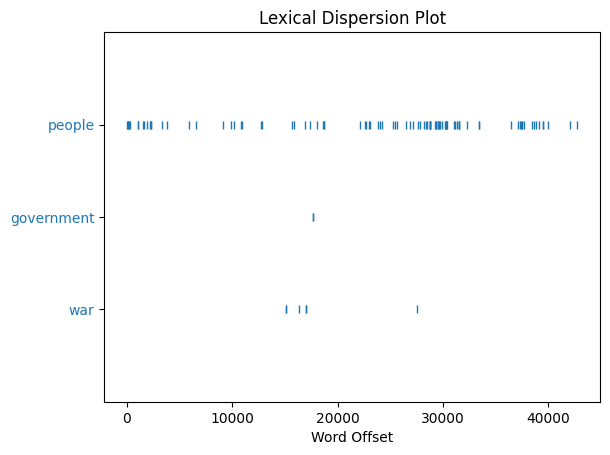

In [23]:
text_nltk.dispersion_plot(["people", "government", "war"])

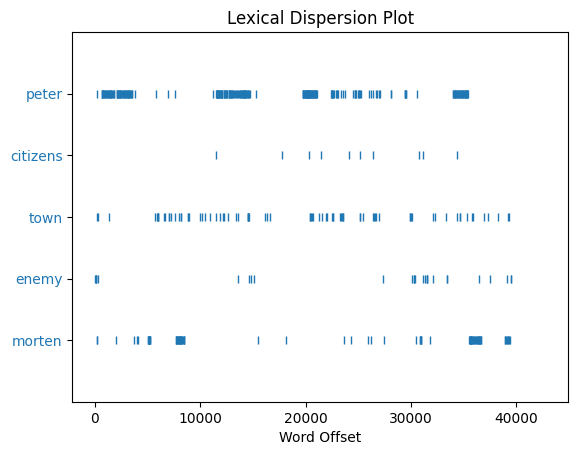

In [ ]:
text_nltk.dispersion_plot(["peter", "citizens", "town", "enemy", "morten"])

In these examples, NLTK will plot each occurrence of the selected words along a timeline of the text. This is useful for **tracking themes, identifying clusters of word usage, or spotting patterns across chapters or sections**.

**Tip for Interpreting Dispersion Plots:**

* The **horizontal axis** represents the position of words in the text (measured in tokens from the beginning).
* Each word in the list is represented by a **colored line or mark** wherever it occurs.
* Clusters of marks indicate sections where the word appears frequently, while gaps show where it doesn’t appear.
* This makes it easy to **visualize themes, track key terms, and compare word usage** across the text.



### **Counting Vocabulary**

Counting words and analyzing their frequencies are fundamental steps when working with text data in NLP. These simple utilities help us understand the **size, diversity, and structure** of a text before moving on to more advanced analyses.

#### Total Number of Tokens

First, let's find out the total length of our text in terms of words and punctuation symbols (called **tokens**). We can use Python’s `len()` function on our `text_nltk` object:

```python
len(text_nltk)
```

This gives the total number of tokens in the text. For example, in our Gutenberg text, we get `42789` tokens.

> **What is a token?**
> A token is a sequence of characters that we want to treat as a single unit. It could be a word (`hairy`), a short word (`his`), or even a punctuation mark or symbol (`:)`). Counting tokens means counting **all occurrences** of these sequences.
>
> For instance, in the phrase *“to be or not to be”*:
>
> * `to` occurs 2 times
> * `be` occurs 2 times
> * `or` occurs 1 time
> * `not` occurs 1 time

#### Number of Unique Tokens

Next, we might want to know how many **unique tokens** the text contains. We can use Python’s `set()` function, which removes duplicates:

```python
sorted(set(text_nltk))  # Shows all unique tokens in alphabetical order
len(set(text_nltk))     # Counts the number of unique tokens
```

* `sorted(set(text_nltk))` will display the full list of unique tokens alphabetically.
* `len(set(text_nltk))` returns a single number: the total count of **distinct tokens**.

> **Why only one number instead of two?**
>
> * `len(text_nltk)` gives the total number of tokens, counting duplicates.
> * `len(set(text_nltk))` gives the number of **unique** tokens, ignoring duplicates.
>
> This distinction is important: a text can have tens of thousands of tokens but far fewer unique words, reflecting repetition and common words like *the*, *and*, *to*.

#### Why This Matters

Knowing the number of tokens and unique tokens helps you:

* Measure **vocabulary richness** in a text
* Identify **frequent vs rare words**
* Prepare for further NLP tasks, such as **frequency analysis, word clouds, or feature extraction**


In [24]:
# This text has 42810 token, but are they all unique??
len(text_nltk)

42810

So this text has 42810 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not.

How many unique tokens does this text have, though? In Python we can obtain that information using the set() function. When you do this, many screens of words will fly past. Now try the following:



In [25]:
# Let's extract only the unique elements by using set() and count them
sorted(set(text_nltk))
len(set(text_nltk))


4174

### **Measuring Lexical Richness**



Next, we can quantify the **lexical richness** of the text—a measure of how varied the vocabulary is. One simple approach is to calculate the **ratio of unique tokens to total tokens**:

$$
\text{Lexical Richness} = \frac{\text{Number of Unique Tokens}}{\text{Total Number of Tokens}}
$$

* The higher this ratio, the more **diverse the vocabulary** in the text.
* A lower ratio indicates that the text uses the same words repeatedly, which is common in simpler or highly repetitive texts.

In Python, we can calculate this as:

```python
unique_tokens = len(set(text_nltk))
total_tokens = len(text_nltk)
lexical_richness = unique_tokens / total_tokens
print(lexical_richness)
```

This gives a value between `0` and `1`, representing the proportion of unique tokens. For example:

* A lexical richness of `0.1` means roughly 10% of all tokens are unique.
* A richness closer to `0.5` or higher indicates a very **diverse vocabulary**.

> **Why it matters:**
>
> * Lexical richness is a simple indicator of **text complexity**.
> * It’s useful for **comparing different authors, genres, or editions**.
> * It can help identify texts with limited or highly repetitive vocabulary, which can be relevant in NLP preprocessing or stylometry.


#### Caveats and Considerations

* **Text length matters:** Longer texts naturally tend to have **more repeated words**, which can lower the lexical richness even if the vocabulary is diverse.
* **Tokenization affects the measure:** Punctuation, contractions, and case-sensitivity can influence the counts. Using consistent preprocessing, like lowercasing and careful tokenization, is important.
* **Not a perfect measure of complexity:** Lexical richness gives a **rough estimate**, but it doesn’t capture grammar, sentence structure, or meaning. It’s most useful for comparing texts of similar type or length.

> **Takeaway:** Lexical richness is a quick way to get a sense of vocabulary diversity, but it should be interpreted carefully, especially when comparing texts of different lengths or genres.


In [26]:
len(set(text_nltk)) / len(text_nltk)

0.09750058397570661

We can perhaps say that the vocabulary in this piece of text is not very diversed

### **Counting Specific Words**



Once we have an overview of the text, we can **zoom in on particular words** to see how often they appear and how significant they are relative to the entire text.

#### Counting Occurrences

The `.count()` method of an NLTK `Text` object tells us how many times a specific word occurs:

```python
print(text_nltk.count("petra"))  # Number of times "petra" appears
```

#### Calculating Relative Frequency

We can also calculate the **percentage of the text** that a word occupies by dividing its count by the total number of tokens:

```python
print(100 * text_nltk.count("stockmann") / len(text_nltk))
```

* This gives the **relative frequency** of the word as a percentage of all tokens.
* Words that appear often will have a higher percentage, showing their prominence in the text.

> **Why this matters:**
>
> * Counting words helps identify **key characters, themes, or topics**.
> * Relative frequency allows for **comparison across texts of different lengths**, giving a normalized measure of importance.



In [ ]:
print(text_nltk.count("petra"))

print(100 * text_nltk.count('stockmann') / len(text_nltk))

126
2.029899556178463


### **Splitting Text into Sentences and Tokens**

In NLP, text is often represented in a **structured way** for analysis:

* A piece of text can be represented as a **list of sentences**.
* Each sentence can be further represented as a **list of tokens** (words, punctuation, or symbols).

This structure makes it easier to perform operations like frequency analysis, concordances, and syntactic parsing.

> **Important note:** There is no perfect way to split a text into sentences or tokens. Different tools use different rules, and some are optimized for specific domains (for example, NLTK provides a **Tweet tokenizer** tailored for social media text).

NLTK provides **pre-implemented functions** for these tasks:

* `sent_tokenize()` → splits a text into sentences
* `word_tokenize()` → splits sentences (or a whole text) into individual words and punctuation

```python
from nltk.tokenize import sent_tokenize, word_tokenize
```

With these functions, we can easily transform a raw string into a list of sentences, and then each sentence into a list of tokens, which sets the foundation for almost all NLP analyses.



In [27]:
#NLTK has pre-implemented functions to split a text into sentences, and sentences into tokens.
from nltk.tokenize import sent_tokenize, word_tokenize

In [28]:
all_sens = sent_tokenize(mytext) #i am taking the raw mytext variable directly, not text_nltk.
len(all_sens)

4242

In [29]:
all_sens[233] #looking at a random sentence.


'May I ask what they will find here to "stir up," as\nyou put it?'

In [30]:
words_in_a_sentence = word_tokenize(all_sens[233])
print(words_in_a_sentence)

['May', 'I', 'ask', 'what', 'they', 'will', 'find', 'here', 'to', '``', 'stir', 'up', ',', "''", 'as', 'you', 'put', 'it', '?']


### **Computing simple statistics from a text**

Once we have tokenized our text, we can start computing **basic statistics** to better understand word usage and frequency patterns. NLTK provides the `FreqDist` class, which makes it easy to count how often each token appears.

```python
from nltk import FreqDist

# Example: compute frequency distribution of tokens
fdist = FreqDist(text_nltk)

# View the 10 most common tokens
fdist.most_common(10)
```

**What this does:**

* `FreqDist(text_nltk)` creates a **frequency distribution** of all tokens in the text.
* `fdist.most_common(10)` shows the **10 most frequently occurring tokens**, along with their counts.

> **Why it matters:**
>
> * Frequency distributions are useful for identifying **common words, key themes, or stopwords**.
> * They are a foundation for more advanced NLP tasks, like creating **word clouds, weighting features, or analyzing co-occurrence patterns**.

In [31]:
from nltk import FreqDist

In [32]:
fdist1 = FreqDist(text_nltk)
print(fdist1)

<FreqDist with 4174 samples and 42810 outcomes>


In [33]:
fdist1.most_common(10)

[('.', 3252),
 (',', 1900),
 ('the', 1592),
 ('to', 958),
 ('you', 936),
 ('stockmann', 869),
 ('i', 843),
 ('of', 805),
 ('a', 710),
 ('and', 707)]

**Accessing Frequency of a Specific Word**

Once we have a frequency distribution, we can **check how often a specific word appears** by using the word as a key:

```python
fdist1["petra"]
```

* This returns the **count of the word `"petra"`** in the text.
* If the word does not exist in the text, `FreqDist` returns `0` rather than raising an error.

> **Why this is useful:**
>
> * Quickly check the importance or prominence of a word in the text.
> * Can be used to compute **relative frequencies**, compare multiple words, or filter words for further analysis.

For example, to calculate the **percentage of the text made up by `"petra"`**:

```python
100 * fdist1["petra"] / len(text_nltk)
```

This gives the **proportion of tokens** that are `"petra"`, helping you understand its significance in the text.



In [35]:
fdist1["petra"]

126

In [38]:
# Selecting words longer than 15 characters.
myvocab = set(text_nltk)

long_words = [w for w in myvocab if len(w) > 15]

long_words

['misrepresentation—',
 '//pglaf.org/donate',
 'misrepresentation',
 'well-intentioned',
 'visitors—typhoid',
 'trademark/copyright',
 '//pglaf.org/fundraising',
 '//gutenberg.org/license',
 'www.gutenberg.org',
 'wrong—absolutely',
 'delighted—delighted',
 'fellow-citizens—a',
 'entire—firm—inconceivable',
 'unenforceability',
 'public—householders',
 'mincemeat—fatheads',
 'side—unfortunately',
 'standard-bearers—those',
 'fellow-citizens—out',
 'father—dismissed',
 'acknowledge—that',
 'well-ascertained',
 'unexpectedly—you',
 'self-opinionated',
 'imprudent—almost',
 'katherine—something',
 'comfortable—plenty',
 '//www.gutenberg.org/2/4/4/2446/',
 'time—unfortunately',
 'broad-mindedness',
 '//www.gutenberg.org',
 'thereabouts—because',
 'womanish—damnably',
 'peter—slow-witted']

Exercise: What are other ways of writing the same line of code for long_words?

In [39]:
# Words that appear more than 10 times and less than 20 times

mylist = [w for w in myvocab if fdist1[w] > 10 and fdist1[w] < 20]
print(len(mylist))
mylist[:10]

150


['name',
 'dare',
 'ca',
 'small',
 'once',
 'looking',
 'archive',
 'off',
 'turn',
 'done']

In [40]:
#The following piece of code does the same too:
mylist = [w for w in myvocab if fdist1[w] in range(11,20)]
print(len(mylist))
mylist[:10]

150


['name',
 'dare',
 'ca',
 'small',
 'once',
 'looking',
 'archive',
 'off',
 'turn',
 'done']

In [41]:
#And, what about this?
mylist = [w for w in myvocab if fdist1[w] in range(10,20)]
print(len(mylist))
mylist[:10]

185


['name',
 'dare',
 'ca',
 'small',
 'once',
 'looking',
 'archive',
 'off',
 'turn',
 'done']

Question: Why are these different?

### **Collocations, ngrams and other counts**


In addition to counting single words, NLP often involves analyzing **patterns of words** that occur together. Two common concepts are **n-grams** and **collocations**:

* **n-grams:** Sequences of `n` consecutive words in a text.

  * Example: `"the cat"` and `"cat sat"` are **bigrams** (2-grams).
  * Trigrams are sequences of 3 words, and so on.
* **Collocations:** Bigrams (or n-grams) that occur **together more often than expected by chance**, highlighting meaningful word combinations in a text.

#### Generating Bigrams

NLTK makes it easy to create bigrams from a tokenized text:

```python
from nltk import bigrams

bigrams_list = list(bigrams(text_nltk))
print(bigrams_list[:10])  # show the first 10 bigrams
```

This generates a list of tuples, each containing a pair of consecutive words from the text.

#### Counting Other Features

We can also compute statistics beyond word frequencies. For example, the **distribution of word lengths** in a text can provide insight into vocabulary complexity:

```python
from nltk import FreqDist

dist = FreqDist([len(w) for w in text_nltk])
print(dist.most_common(10))  # most common word lengths
```

* Here, `[len(w) for w in text_nltk]` creates a list of **word lengths**.
* `FreqDist` counts how often each length occurs, giving a sense of **word complexity** in the text.

> **Why this matters:**
>
> * N-grams and collocations help identify **common phrases, idioms, or repeated structures**.
> * Word-length distributions and similar statistics provide additional **insights into style and vocabulary**.



In [42]:
from nltk import bigrams
bigrams_list = list(bigrams(text_nltk))

In [43]:
len(bigrams_list)

42809

In [44]:
bigrams_list[22]

('anyone', 'anywhere')

In [45]:
text_nltk.collocations()

dr. stockmann; peter stockmann; mrs. stockmann; project gutenberg-tm;
morten kiil; project gutenberg; captain horster; mr. hovstad; literary
archive; gutenberg-tm electronic; electronic works; archive
foundation; gutenberg literary; united states; medical officer;
compact majority; water supply; public opinion; set forth; native town


In [46]:
text_nltk.collocation_list()

[('dr.', 'stockmann'),
 ('peter', 'stockmann'),
 ('mrs.', 'stockmann'),
 ('project', 'gutenberg-tm'),
 ('morten', 'kiil'),
 ('project', 'gutenberg'),
 ('captain', 'horster'),
 ('mr.', 'hovstad'),
 ('literary', 'archive'),
 ('gutenberg-tm', 'electronic'),
 ('electronic', 'works'),
 ('archive', 'foundation'),
 ('gutenberg', 'literary'),
 ('united', 'states'),
 ('medical', 'officer'),
 ('compact', 'majority'),
 ('water', 'supply'),
 ('public', 'opinion'),
 ('set', 'forth'),
 ('native', 'town')]

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:



In [47]:
dist = FreqDist([len(w) for w in text_nltk])

In [48]:
dist

FreqDist({1: 9032, 3: 7859, 2: 7007, 4: 6408, 5: 3531, 6: 2329, 7: 2278, 9: 1813, 8: 1192, 10: 585, ...})

In [49]:
len(dist)

23

In [50]:
dist[21] #seeing how many 21 character tokens exist

0

In [51]:
dist.max() #What is this doing?

1

In [52]:
100*dist.freq(5)

8.248072880168184

i.e., words of length 5 occupy about 8% of the text

In [53]:
100*dist.freq(19)

0.01635131978509694

<Axes: xlabel='Samples', ylabel='Counts'>

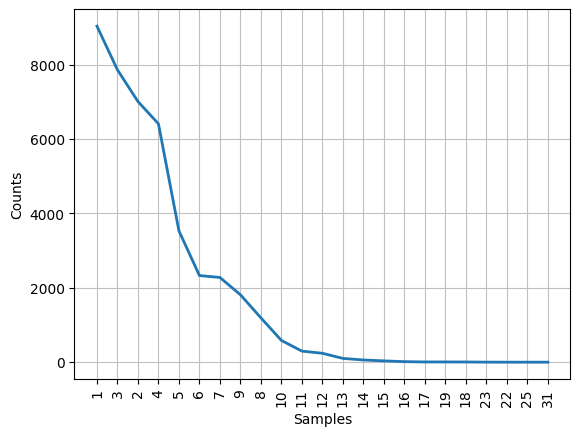

In [54]:
dist.plot()

Exercise: Think about how you can extract trigrams and their frequency distribution, based on what you learnt so far, and exploring a little bit of NLTK!